Wrtie a straddlePricer function that takes volatility and time as inputs

In [5]:
vol=0.2
time=1

def straddlePricer(vol, time):
    return 2. * ((1. / (2 * 3.14) ** 0.5) * vol * time ** 0.5)

straddlePricer(vol, time)

0.15961737689352445

Updating straddlePricer() to make vol and time optional arguments

In [9]:
def straddlePricer(vol=0.2, time=1):
    return 2. * ((1. / (2 * 3.14) ** 0.5) * vol * time ** 0.5)

print(straddlePricer())
print(straddlePricer(0.4, 2))

0.15961737689352445
0.4514661183864804


Clean up the function with the use of Numpy

In [12]:
import numpy as np

def straddlePricer(vol=0.2, time=1):
    return 2. * ((1 / np.sqrt(2 * np.pi)) * vol * np.sqrt(time))

straddlePricer()

0.1595769121605731

Pricing a straddle using a Monte Carlo simulation. Start by generating some variance. There are 2 methods here: 

1. Divide the variance by time and take the square root to get a daily volatility, or
2. take the square root of variance (volatility) and divide by the root of time.

Both methods are similar, code below shows it. Moving forward with the Monte Carlo simulation, we'll use option 2.

In [13]:
vol = 0.2
var = vol ** 2
sqrtVarOverTime = np.sqrt(var / 252)
volOverSqrtTime = vol / np.sqrt(252)
valuesEqual = np.isclose(sqrtVarOverTime, volOverSqrtTime)
print(f"sqrtVarOverTime: {sqrtVarOverTime}, volOverSqrtTime: {volOverSqrtTime}, Are they close? {valuesEqual}")

sqrtVarOverTime: 0.012598815766974242, volOverSqrtTime: 0.01259881576697424, Are they close? True


In [14]:
def straddlePricerMC(vol=0.2, time=1.0, mcPaths=100):
    dailyVol = vol / np.sqrt(252.)
    resultSum = 0
    for _ in range (mcPaths):
        resultSum+=np.abs(np.prod(1 + (np.random.normal(0, dailyVol, int(round(time * 252))))) - 1)
    return resultSum / mcPaths

straddlePricerMC()

0.16598154975905377

running straddlePricerMC with different numbers of mcPaths

In [16]:
print(f"1 path: {straddlePricerMC(mcPaths=1)}")
print(f"2000 path: {straddlePricerMC(mcPaths=2000)}")
print(f"5000 path: {straddlePricerMC(mcPaths=5000)}")
print(f"10000 path: {straddlePricerMC(mcPaths=10000)}")
print(f"100000 path: {straddlePricerMC(mcPaths=100000)}")
print(f"Closed form approximation: {straddlePricer()}")

1 path: 0.22107082628087782
2000 path: 0.1572900754692534
5000 path: 0.1615398536305991
10000 path: 0.16127942201682777
100000 path: 0.15991121754972853
Closed form approximation: 0.1595769121605731


Lets upgrade the straddlePricerMC function with pandas

In [3]:
import pandas as pd
nDays = time * 252
size = (nDays, 15)
simulatedAsset = pd.DataFrame(np.random.normal(0, dailyVol, size))
simulatedAsset = (1 + simulatedAsset).cumprod()

simulatedAsset.tail()


ModuleNotFoundError: No module named 'pandas'

NameError: name 'simulatedAsset' is not defined

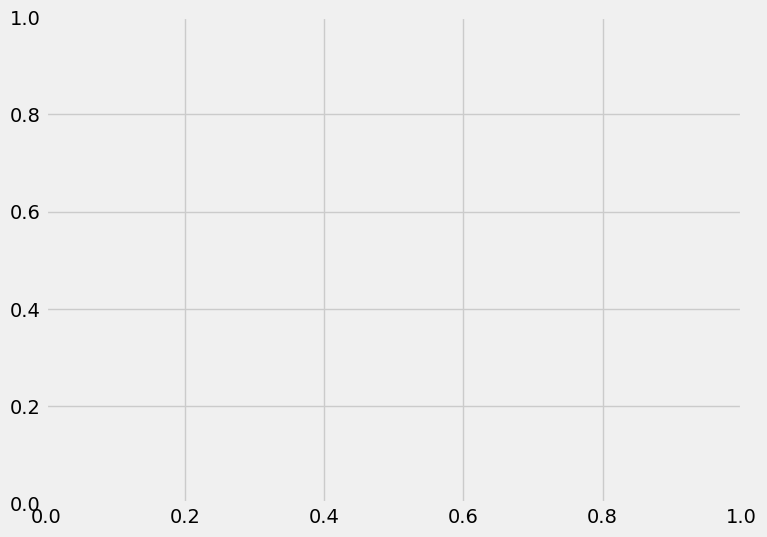

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(8,6))
ax = plt.axes()
_ = ax.plot(simulatedAsset)

In [5]:
def straddlePricerMCWithPD(vol=0.2, time=1, mcPaths=100000):
    dailyVol = vol / (252 ** 0.5)
    randomPaths = pd.DataFrame(np.random.normal(0, dailyVol, (time*252, mcPaths)))
    price = ((1 + randomPaths).prod() - 1).abs().sum() / mcPaths
    return price

straddlePricerMCWithPD()

NameError: name 'pd' is not defined